# Automobile Price Prediction

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Dictionary

####**1) Symboling:**-3, -2, -1, 0, 1, 2, 3  A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
####**2) Normalized-losses:**continuous from 65 to 256 it is the relative average loss payment per insured vehicle year.
####**3) Make:**it is the brand of the vehicle,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo.
####**4) Fuel-type:**diesel, gas.
####**5) Aspiration:**std, turbo.it is an internal combustion (IC) engine where the intake of air depends on the atmospheric pressure.
####**6) Num-of-doors:**four, two.
####**7) Body-style:**it is the shape and model of a particular automobile make.hardtop, wagon, sedan, hatchback, convertible 
####**8) Drive-wheels:**4wd, fwd, rwd.A drive wheel is a wheel of a motor vehicle that transmits force, transforming torque into tractive force from the tires to the road.
####**9) Engine-location:**front, rear.The front-engine, rear-wheel drive layout is one where the engine is located at the front of thevehicle and driven wheels are located at the rear.
####**10) Wheel-base:**it is the distance between the centres of the front and rear wheels.
####**11) Length:**it is just the distance from a car's front tip to the farthest point in the back.
####**12) Width:**it is the distance between the nearside and offside vehicle planes.
####**13) Height:**continuous from 47.8 to 59.8.
####**14) Curb-weight:**it is the weight of the vehicle including a full tank of fuel and all standard equipment.
####15) Engine-type:**dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
####**16) Num-of-cylinders:**eight, five, four, six, three, twelve, two.
####**17) Engine-size:**it is referred to as its capacity.
####**18) Fuel-system:**it is responsible for delivering fuel to the engine as needed.
####**19) Bore:**it is the diameter of each cylinder.
####**20) Stroke:**it is a phase of the engine's cycle.
####**21) Compression-ratio:**it is  the ratio of the volume of the cylinder and its head space.
####**22) Horsepower:**it is refer to the power an engine produces.
####**23) Peak-rpm:**continuous from 4150 to 6600.
####**24) City-mpg:**This number is the average MPG for your car in the city. Since city driving tends to mean rougherroads and frequent stopping and starting.
####**25) Highway-mpg:** Highway MPG is the average MPG for your car on the highway. Even though you’ll be driving faster and often for longer stretches of time, highways are smoother than city roads and keep your engine runningat consistent levels, which requires less gas.
####**26) Price:**continuous from 5118 to 45400.

## Data Acquisition

*There are various formats for a dataset such as .csv, .json, .xlsx etc. The dataset can be stored in different places on your local machine or sometimes online.
*In our case, the Automobile Dataset is an online source and it is in CSV (comma separated value) format.
*data type: csv
*The Pandas Library is a useful tool that enables us to read various datasets into a data frame; our Jupyter notebook platforms have a built-in Pandas Library so that all we need to do is import Pandas without installing.
Use pandas.read_csv() function to read the csv file. In the bracket, put the file path along so that pandas will read the file into a data frame from that address. The file path can be either an URL or local file address.
Because the data does not include headers, add an argument headers = None inside the read_csv() method, so that pandas will not automatically set the first row as a header

## Importing Labraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plta
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [102]:
#to display all the rows and columns of a dataset 
pd.set_option("display.max_rows",None)

In [103]:
df = pd.read_csv('/content/drive/MyDrive/data/auto_imports_a.csv')
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925


In [104]:
# create headers for auto_price_prediction
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [105]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


### Data Understanding and Exploration

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized-losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel-type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         200 non-null    object 
 7   drive-wheels       200 non-null    object 
 8   engine-location    200 non-null    object 
 9   wheel-base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb-weight        200 non-null    int64  
 14  engine-type        200 non-null    object 
 15  num-of-cylinders   200 non-null    object 
 16  engine-size        200 non

Data has a variety of types.The main types stored in Pandas dataframes are object, float, int, bool and datetime64. In order to better learn about each attribute, it is always good to know the data type of each column. In Pandas

From the information of data we can see that  normalized-losses, bore,stroke,peak-rpm,horsepower this feature are in numerical value but it is in object type so we need to convert it into int64 and float64 according to the feature values. 


There are  205 rows, 26 columns.
The column“Price” is the target variable and rest of the columns are independent variables.

### Handling missing values
#### steps for handling missing values 
1)Identify missing data
2)Deal with missing data
3)Correct data format

### identify missing values
#### Convert "?" to NaN
in the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker for reasons of computational speed and convenience.

In [107]:
df.replace("?", np.nan,inplace=True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


Identify missing data Deal with missing data Correct data format Identify missing values Convert "?" to NaN In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number).

seperating the numerical columns and categorical columns.
The independent variables divided into categorical and numerical variables

In [108]:
# let seprate numerical columns
df_numerical = df.select_dtypes(include=["int64","float64"])
df_numerical

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500
1,1,94.5,171.2,65.5,52.4,2823,152,9.00,19,26,16500
2,2,99.8,176.6,66.2,54.3,2337,109,10.00,24,30,13950
3,2,99.4,176.6,66.4,54.3,2824,136,8.00,18,22,17450
4,2,99.8,177.3,66.3,53.1,2507,136,8.50,19,25,15250
5,1,105.8,192.7,71.4,55.7,2844,136,8.50,19,25,17710
6,1,105.8,192.7,71.4,55.7,2954,136,8.50,19,25,18920
7,1,105.8,192.7,71.4,55.9,3086,131,8.30,17,20,23875
8,2,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16430
9,0,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16925


Numerical variables:[‘wheelbase’, ‘length’, ‘width’, ‘height’, ‘curbweight’, ‘enginesize’,‘compressionratio’,
                     ‘citympg’, ‘highwaympg’]

Some numerical columns like 'bore','stroke','horsepower','peak-rpm' are in the object type , we need to convert it
into numerical columns 

In [109]:
# lets see the categorical columns 
df_categorical = df.select_dtypes(include=["object"])
df_categorical

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
2,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
3,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500
4,NaN,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
5,158,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
6,NaN,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
7,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,3.13,3.40,140,5500
8,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi,3.50,2.80,101,5800
9,192,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.50,2.80,101,5800


In [110]:
df_categorical.columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

we can see that some numerical columns are present in the categorical data frame it is because from the information of data we can see that normalized-losses, bore, stroke,peak-rpm, horsepower this feature are in numerical value but it is in object type so we need to convert it into int64 and float64 according to the feature values. this conversion is done after replacing the NaN value with some numerical values.

In [111]:
## we are seprateing numerical columns which are present in categorical dataframe using filter function 
df_categorical_numerical= df_categorical.filter(['normalized-losses','bore', 'stroke', 'horsepower',
       'peak-rpm' ])
df_categorical_numerical

,normalized-losses,bore,stroke,horsepower,peak-rpm
0,NaN,3.47,2.68,111,5000
1,NaN,2.68,3.47,154,5000
2,164,3.19,3.40,102,5500
3,164,3.19,3.40,115,5500
4,NaN,3.19,3.40,110,5500
5,158,3.19,3.40,110,5500
6,NaN,3.19,3.40,110,5500
7,158,3.13,3.40,140,5500
8,192,3.50,2.80,101,5800
9,192,3.50,2.80,101,5800


In [112]:
df_categorical_ = df_categorical. filter([ 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system'])
df_categorical

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,3.47,2.68,111,5000
1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,2.68,3.47,154,5000
2,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.19,3.40,102,5500
3,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,3.19,3.40,115,5500
4,NaN,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
5,158,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
6,NaN,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi,3.19,3.40,110,5500
7,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi,3.13,3.40,140,5500
8,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi,3.50,2.80,101,5800
9,192,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi,3.50,2.80,101,5800


#### Evaluating  for missing values 
There are two methods to detect missing data:
1) .isnull()
2) .notnull()
"True" stands for missing value, while "False" stands for not missing value.

In [113]:
# number of missing values present in numerical features 
df_categorical_numerical.isnull().sum()

normalized-losses    36
bore                  4
stroke                4
horsepower            2
peak-rpm              2
dtype: int64

In [114]:
missing_numerical_data = df_categorical_numerical.isnull()
missing_numerical_data.head(5)

,normalized-losses,bore,stroke,horsepower,peak-rpm
0,True,False,False,False,False
1,True,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,True,False,False,False,False


#### Counting the missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column."True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [115]:
for column in missing_numerical_data.columns.values.tolist():
    print(column)
    print(missing_numerical_data[column].value_counts())
    print("")  

normalized-losses
False    164
True      36
Name: normalized-losses, dtype: int64

bore
False    196
True       4
Name: bore, dtype: int64

stroke
False    196
True       4
Name: stroke, dtype: int64

horsepower
False    198
True       2
Name: horsepower, dtype: int64

peak-rpm
False    198
True       2
Name: peak-rpm, dtype: int64



Each column has 200 rows of data and 5 columns containing missing data:
1) "normalized-losses": 36 missing data, 2) "bore": 4 missing data 3) "stroke" : 4 missing data 4)"horsepower": 2 missing data 5) "peak-rpm": 2 missing data  replace them with median.

### Deal with missing data
1) drop data
   a. drop the whole row
   b. drop the whole column
2) replace data
   a. replace it by mean
   b. replace it by frequency
   c. replace it based on other functions
   
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

#### Replace with median:
"normalized-losses": 36 missing data, replace them with median
"stroke": 4 missing data, replace them with median
"bore": 4 missing data, replace them with median
"horsepower": 2 missing data, replace them with median
"peak-rpm": 2 missing data, replace them with median

In [116]:

df_missing_numerical = df_categorical_numerical.fillna(df_categorical_numerical.median())
df_missing_numerical

,normalized-losses,bore,stroke,horsepower,peak-rpm
0,115,3.47,2.68,111,5000
1,115,2.68,3.47,154,5000
2,164,3.19,3.40,102,5500
3,164,3.19,3.40,115,5500
4,115,3.19,3.40,110,5500
5,158,3.19,3.40,110,5500
6,115,3.19,3.40,110,5500
7,158,3.13,3.40,140,5500
8,192,3.50,2.80,101,5800
9,192,3.50,2.80,101,5800


In [117]:
df_missing_numerical.isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [118]:
df_missing_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   normalized-losses  200 non-null    object
 1   bore               200 non-null    object
 2   stroke             200 non-null    object
 3   horsepower         200 non-null    object
 4   peak-rpm           200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


we can see that the features are in object data type, we have replaced the NaN values with median but this column (data types) are objects so now we convert the object data type
into int64 and float64 

In [119]:
df_missing_numerical[["bore", "stroke"]] = df_missing_numerical[["bore", "stroke"]].astype("float")
df_missing_numerical[["normalized-losses"]] = df_missing_numerical[["normalized-losses"]].astype("int")
df_missing_numerical[["peak-rpm"]] = df_missing_numerical[["peak-rpm"]].astype("int")

In [120]:
df_missing_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  200 non-null    int64  
 1   bore               200 non-null    float64
 2   stroke             200 non-null    float64
 3   horsepower         200 non-null    object 
 4   peak-rpm           200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [121]:
## number of missing values present in categorical features 
df_categorical_.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [122]:
missing_categorical_data = df_categorical_.isnull()
missing_categorical_data.head(5)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [123]:
for column in missing_categorical_data.columns.values.tolist():
    print(column)
    print(missing_categorical_data[column].value_counts())
    print("")  

make
False    200
Name: make, dtype: int64

fuel-type
False    200
Name: fuel-type, dtype: int64

aspiration
False    200
Name: aspiration, dtype: int64

num-of-doors
False    198
True       2
Name: num-of-doors, dtype: int64

body-style
False    200
Name: body-style, dtype: int64

drive-wheels
False    200
Name: drive-wheels, dtype: int64

engine-location
False    200
Name: engine-location, dtype: int64

engine-type
False    200
Name: engine-type, dtype: int64

num-of-cylinders
False    200
Name: num-of-cylinders, dtype: int64

fuel-system
False    200
Name: fuel-system, dtype: int64



"num-of-doors": 2 missing data  replace them with mode. because it is a categorical feature

### Replace by mode

In [124]:
df_missing_categorical = df_categorical_.fillna(df_categorical_.mode())
df_missing_categorical

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
6,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
7,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi


In [125]:
df_missing_categorical.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        2
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

In [126]:
df_categorical_['num-of-doors'].mode()

0    four
dtype: object

finding the mode of column num-of-doors and replacing the NaN value with mode.
"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur.

In [127]:
df_categorical_clean = df_categorical_.fillna({"num-of-doors" : "four"})
df_categorical_clean

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
6,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
7,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi


In [128]:
df_categorical_clean.isnull().sum()

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
engine-location     0
engine-type         0
num-of-cylinders    0
fuel-system         0
dtype: int64

we can see the data has cleaned we have replaced NaN value with a median for numerical and mode for categorical features 
now we concatenate the the cleaned data 

In [129]:
df_clean = pd.concat([df_numerical,df_missing_numerical,df_categorical_clean], axis=1)
df_clean

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500,115,3.47,2.68,111,5000,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,94.5,171.2,65.5,52.4,2823,152,9.00,19,26,16500,115,2.68,3.47,154,5000,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,99.8,176.6,66.2,54.3,2337,109,10.00,24,30,13950,164,3.19,3.40,102,5500,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,99.4,176.6,66.4,54.3,2824,136,8.00,18,22,17450,164,3.19,3.40,115,5500,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,99.8,177.3,66.3,53.1,2507,136,8.50,19,25,15250,115,3.19,3.40,110,5500,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
5,1,105.8,192.7,71.4,55.7,2844,136,8.50,19,25,17710,158,3.19,3.40,110,5500,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
6,1,105.8,192.7,71.4,55.7,2954,136,8.50,19,25,18920,115,3.19,3.40,110,5500,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
7,1,105.8,192.7,71.4,55.9,3086,131,8.30,17,20,23875,158,3.13,3.40,140,5500,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,2,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16430,192,3.50,2.80,101,5800,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,0,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16925,192,3.50,2.80,101,5800,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi


In [130]:
df_clean.isnull().sum()

symboling            0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
city-mpg             0
highway-mpg          0
price                0
normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
dtype: int64

## Exploratory Data Analysis

In [131]:
df_clean.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,peak-rpm
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000,120.740000,3.329600,3.260450,5119.000000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558,32.189645,0.268577,0.314205,479.309596
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000,65.000000,2.540000,2.070000,4150.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000,100.250000,3.150000,3.117500,4800.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000,115.000000,3.310000,3.290000,5200.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000,138.250000,3.582500,3.410000,5500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000,256.000000,3.940000,4.170000,6600.000000


From the above code, we can see the calculation of  mean and standard deviation etc of the numerical features.
This shows the statistical summary of all numeric-typed (int, float) columns.
For example, the attribute "symboling" has 200 counts, the mean value of this column is 0.83, the standard deviation is 1.24, the minimum value is -2, 25th percentile is 0, 50th percentile is 1, 75th percentile is 2, and the maximum value is 3.

In [132]:
df_clean.nunique()

symboling              6
wheel-base            52
length                73
width                 43
height                49
curb-weight          169
engine-size           43
compression-ratio     32
city-mpg              29
highway-mpg           30
price                185
normalized-losses     51
bore                  38
stroke                36
horsepower            59
peak-rpm              22
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
engine-type            6
num-of-cylinders       7
fuel-system            8
dtype: int64

The unique method returns the number of unique values for each column.

In [133]:
df_clean["make"].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
isuzu             2
renault           2
alfa-romero       2
mercury           1
Name: make, dtype: int64

we can see the highest number of cars are toyota company 

In [134]:
df_clean["fuel-system"].value_counts()

mpfi    91
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [135]:
df_clean["num-of-doors"].value_counts()

four    115
two      85
Name: num-of-doors, dtype: int64

In [136]:
df_clean["engine-type"].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
Name: engine-type, dtype: int64

In [137]:
df_clean["body-style"].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     5
Name: body-style, dtype: int64

In [138]:
## here we can see the dataframe that according to incresing value of engine-size.
df_clean.sort_values(by="engine-size", ascending=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
16,2,88.4,141.1,60.3,53.2,1488,61,9.50,47,53,5151,121,2.91,3.03,48,5100,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
51,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,10945,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
52,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,11845,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
53,3,95.3,169.0,65.7,49.6,2385,70,9.40,17,23,13645,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
30,1,93.7,150.0,64.0,52.6,1837,79,10.10,38,42,5399,101,2.91,3.07,60,5500,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
54,3,95.3,169.0,65.7,49.6,2500,80,9.40,16,23,15645,150,3.31,3.29,135,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi
20,1,93.7,157.3,63.8,50.8,1876,90,9.40,31,38,6377,118,2.97,3.23,68,5500,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
19,1,93.7,157.3,63.8,50.8,1876,90,9.41,37,41,5572,118,2.97,3.23,68,5500,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
18,0,94.5,158.8,63.6,52.0,1909,90,9.60,38,43,6575,81,3.03,3.11,70,5400,chevrolet,gas,std,four,sedan,fwd,front,ohc,four,2bbl
17,1,94.5,155.9,63.6,52.0,1874,90,9.60,38,43,6295,98,3.03,3.11,70,5400,chevrolet,gas,std,two,hatchback,fwd,front,ohc,four,2bbl


In [139]:
## here we can see the dataframe that according to incresing value of bore and stroke.
df_clean.sort_values(by=["bore", "stroke"], ascending=[True, True])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
129,3,99.1,186.6,66.5,56.1,2707,121,9.30,21,28,15040,150,2.54,2.07,110,5250,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
1,1,94.5,171.2,65.5,52.4,2823,152,9.00,19,26,16500,115,2.68,3.47,154,5000,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
16,2,88.4,141.1,60.3,53.2,1488,61,9.50,47,53,5151,121,2.91,3.03,48,5100,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
30,1,93.7,150.0,64.0,52.6,1837,79,10.10,38,42,5399,101,2.91,3.07,60,5500,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
28,2,86.6,144.6,63.9,50.8,1713,92,9.60,49,54,6479,137,2.91,3.41,58,4800,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
29,2,86.6,144.6,63.9,50.8,1819,92,9.20,31,38,6855,137,2.91,3.41,76,6000,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
31,1,93.7,150.0,64.0,52.6,1940,92,9.20,30,34,6529,101,2.91,3.41,76,6000,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
32,1,93.7,150.0,64.0,52.6,1956,92,9.20,30,34,7129,101,2.91,3.41,76,6000,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
33,0,96.5,163.4,64.0,54.5,2010,92,9.20,30,34,7295,110,2.91,3.41,76,6000,honda,gas,std,four,sedan,fwd,front,ohc,four,1bbl
34,0,96.5,157.1,63.9,58.3,2024,92,9.20,30,34,7295,78,2.92,3.41,76,6000,honda,gas,std,four,wagon,fwd,front,ohc,four,1bbl


In [140]:
## here we can see the dataframe that according to incresing value of engine-size and price.
df_clean.sort_values(by=["engine-size", "price"], ascending=[True, True])

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
16,2,88.4,141.1,60.3,53.2,1488,61,9.50,47,53,5151,121,2.91,3.03,48,5100,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
51,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,10945,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
52,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,11845,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
53,3,95.3,169.0,65.7,49.6,2385,70,9.40,17,23,13645,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
30,1,93.7,150.0,64.0,52.6,1837,79,10.10,38,42,5399,101,2.91,3.07,60,5500,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
54,3,95.3,169.0,65.7,49.6,2500,80,9.40,16,23,15645,150,3.31,3.29,135,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi
19,1,93.7,157.3,63.8,50.8,1876,90,9.41,37,41,5572,118,2.97,3.23,68,5500,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
114,1,93.7,157.3,63.8,50.8,1918,90,9.40,37,41,5572,119,2.97,3.23,68,5500,plymouth,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
22,1,93.7,157.3,63.8,50.6,1967,90,9.40,31,38,6229,148,2.97,3.23,68,5500,dodge,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
116,1,93.7,157.3,63.8,50.6,1967,90,9.40,31,38,6229,154,2.97,3.23,68,5500,plymouth,gas,std,four,hatchback,fwd,front,ohc,four,2bbl


In [141]:
## the automoble which symboling +3 indicates that the auto is risky, from the dataframe we can see only the auto risky.
df_clean[df_clean["symboling"] == 3]

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500,115,3.47,2.68,111,5000,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
27,3,95.9,173.2,66.3,50.2,2811,156,7.00,19,24,12964,145,3.60,3.90,145,5000,dodge,gas,turbo,two,hatchback,fwd,front,ohc,four,mfi
51,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,10945,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
52,3,95.3,169.0,65.7,49.6,2380,70,9.40,17,23,11845,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
53,3,95.3,169.0,65.7,49.6,2385,70,9.40,17,23,13645,150,3.31,3.29,101,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
54,3,95.3,169.0,65.7,49.6,2500,80,9.40,16,23,15645,150,3.31,3.29,135,6000,mazda,gas,std,two,hatchback,rwd,front,rotor,two,mpfi
68,3,96.6,180.3,70.5,50.8,3685,234,8.30,16,18,35056,142,3.46,3.10,155,4750,mercedes-benz,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi
76,3,96.3,173.0,65.4,49.4,2370,110,7.50,23,30,9959,153,3.17,3.46,116,5500,mitsubishi,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi
77,3,96.3,173.0,65.4,49.4,2328,122,8.50,25,32,8499,153,3.35,3.46,88,5000,mitsubishi,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
78,3,95.9,173.2,66.3,50.2,2833,156,7.00,19,24,12629,115,3.58,3.86,145,5000,mitsubishi,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi


In [142]:
### the auto which has only fule type gas.
df_clean[df_clean["fuel-type"] == "gas"]

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500,115,3.47,2.68,111,5000,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,1,94.5,171.2,65.5,52.4,2823,152,9.00,19,26,16500,115,2.68,3.47,154,5000,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
2,2,99.8,176.6,66.2,54.3,2337,109,10.00,24,30,13950,164,3.19,3.40,102,5500,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,99.4,176.6,66.4,54.3,2824,136,8.00,18,22,17450,164,3.19,3.40,115,5500,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,99.8,177.3,66.3,53.1,2507,136,8.50,19,25,15250,115,3.19,3.40,110,5500,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
5,1,105.8,192.7,71.4,55.7,2844,136,8.50,19,25,17710,158,3.19,3.40,110,5500,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
6,1,105.8,192.7,71.4,55.7,2954,136,8.50,19,25,18920,115,3.19,3.40,110,5500,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
7,1,105.8,192.7,71.4,55.9,3086,131,8.30,17,20,23875,158,3.13,3.40,140,5500,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,2,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16430,192,3.50,2.80,101,5800,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,0,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16925,192,3.50,2.80,101,5800,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi


In [143]:
df_clean[df_clean["make"] == "toyota"]

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
145,1,95.7,158.7,63.6,54.5,1985,92,9.0,35,39,5348,87,3.05,3.03,62,4800,toyota,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
146,1,95.7,158.7,63.6,54.5,2040,92,9.0,31,38,6338,87,3.05,3.03,62,4800,toyota,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
147,1,95.7,158.7,63.6,54.5,2015,92,9.0,31,38,6488,74,3.05,3.03,62,4800,toyota,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
148,0,95.7,169.7,63.6,59.1,2280,92,9.0,31,37,6918,77,3.05,3.03,62,4800,toyota,gas,std,four,wagon,fwd,front,ohc,four,2bbl
149,0,95.7,169.7,63.6,59.1,2290,92,9.0,27,32,7898,81,3.05,3.03,62,4800,toyota,gas,std,four,wagon,4wd,front,ohc,four,2bbl
150,0,95.7,169.7,63.6,59.1,3110,92,9.0,27,32,8778,91,3.05,3.03,62,4800,toyota,gas,std,four,wagon,4wd,front,ohc,four,2bbl
151,0,95.7,166.3,64.4,53.0,2081,98,9.0,30,37,6938,91,3.19,3.03,70,4800,toyota,gas,std,four,sedan,fwd,front,ohc,four,2bbl
152,0,95.7,166.3,64.4,52.8,2109,98,9.0,30,37,7198,91,3.19,3.03,70,4800,toyota,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
153,0,95.7,166.3,64.4,53.0,2275,110,22.5,34,36,7898,91,3.27,3.35,56,4500,toyota,diesel,std,four,sedan,fwd,front,ohc,four,idi
154,0,95.7,166.3,64.4,52.8,2275,110,22.5,38,47,7788,91,3.27,3.35,56,4500,toyota,diesel,std,four,hatchback,fwd,front,ohc,four,idi


In [144]:
df_clean[df_clean["num-of-cylinders"] == "four"]

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500,115,3.47,2.68,111,5000,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,2,99.8,176.6,66.2,54.3,2337,109,10.00,24,30,13950,164,3.19,3.40,102,5500,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
8,2,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16430,192,3.50,2.80,101,5800,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,0,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16925,192,3.50,2.80,101,5800,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi
17,1,94.5,155.9,63.6,52.0,1874,90,9.60,38,43,6295,98,3.03,3.11,70,5400,chevrolet,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
18,0,94.5,158.8,63.6,52.0,1909,90,9.60,38,43,6575,81,3.03,3.11,70,5400,chevrolet,gas,std,four,sedan,fwd,front,ohc,four,2bbl
19,1,93.7,157.3,63.8,50.8,1876,90,9.41,37,41,5572,118,2.97,3.23,68,5500,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
20,1,93.7,157.3,63.8,50.8,1876,90,9.40,31,38,6377,118,2.97,3.23,68,5500,dodge,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
21,1,93.7,157.3,63.8,50.8,2128,98,7.60,24,30,7957,118,3.03,3.39,102,5500,dodge,gas,turbo,two,hatchback,fwd,front,ohc,four,mpfi
22,1,93.7,157.3,63.8,50.6,1967,90,9.40,31,38,6229,148,2.97,3.23,68,5500,dodge,gas,std,four,hatchback,fwd,front,ohc,four,2bbl


In [145]:
df_clean[(df_clean["symboling"] == 3) & (df_clean["fuel-type"] == "gas")]["engine-size"].max()

234

In [146]:
df_clean[(df_clean["fuel-system"] == "mpfi") & (df_clean["fuel-type"] == "gas")]["engine-size"].max()

326

In [147]:
df_clean[(df_clean['num-of-cylinders'] == "twelve") & (df_clean['fuel-type'] == "gas")]["engine-size"].min()

326

In [148]:
df_clean[(df_clean['num-of-cylinders'] == "twelve") & (df_clean['fuel-type'] == "gas")]['engine-size'].max()

326

In [149]:
df_clean.groupby("make").describe()['engine-size']

,count,mean,std,min,25%,50%,75%,max
make,,,,,,,,
alfa-romero,2.0,141.000000,15.556349,130.0,135.50,141.0,146.5,152.0
audi,6.0,130.666667,10.801234,109.0,132.25,136.0,136.0,136.0
bmw,8.0,166.875000,41.885686,108.0,150.00,164.0,209.0,209.0
chevrolet,3.0,80.333333,16.743158,61.0,75.50,90.0,90.0,90.0
dodge,9.0,102.666667,22.538855,90.0,90.00,90.0,98.0,156.0
honda,13.0,99.307692,10.873397,79.0,92.00,92.0,110.0,110.0
isuzu,2.0,115.000000,5.656854,111.0,113.00,115.0,117.0,119.0
jaguar,3.0,280.666667,39.259818,258.0,258.00,258.0,292.0,326.0
mazda,17.0,103.000000,23.732889,70.0,91.00,91.0,122.0,140.0


From the above group function, we can see that according to automobile make the engine size is described. For example, according to the attribute, "dodge" has 9 counts, the mean value of this column is 102.66666, the standard deviation is 22.538855, the minimum value is 90.0, 25th percentile is 90, 50th percentile is 90, 75th percentile is 98, and the maximum value is 156.

In [150]:
df_clean.groupby('num-of-cylinders').describe()['engine-size']

,count,mean,std,min,25%,50%,75%,max
num-of-cylinders,,,,,,,,
eight,4.0,270.000000,41.601282,234.0,234.00,269.0,305.0,308.0
five,10.0,154.300000,24.747839,131.0,136.00,136.0,183.0,183.0
four,156.0,112.980769,19.527143,79.0,97.00,109.0,122.0,156.0
six,24.0,185.291667,28.008507,145.0,169.25,181.0,194.0,258.0
three,1.0,61.000000,NaN,61.0,61.00,61.0,61.0,61.0
twelve,1.0,326.000000,NaN,326.0,326.00,326.0,326.0,326.0
two,4.0,72.500000,5.000000,70.0,70.00,70.0,72.5,80.0


From the above group function, we can see that according to automobile the num-of-cylinders and  engine size is described. For example, according to the attribute, "four" has 156.0 counts, the mean value of this column is 112.980769 ,maximum value is 156.

In [151]:
df_clean.groupby('num-of-doors').describe()["length"]

,count,mean,std,min,25%,50%,75%,max
num-of-doors,,,,,,,,
four,115.0,178.400870,11.522796,157.1,171.7,175.6,187.8,208.1
two,85.0,168.582353,11.174931,141.1,159.1,168.9,176.2,199.2


In [152]:
df_clean.groupby("engine-type").describe()['engine-size']

,count,mean,std,min,25%,50%,75%,max
engine-type,,,,,,,,
dohc,11.0,159.818182,55.858425,98.0,121.0,161.0,171.0,258.0
l,12.0,129.583333,26.448778,61.0,120.0,127.0,152.0,152.0
ohc,145.0,117.827586,27.013203,79.0,97.0,110.0,136.0,209.0
ohcf,15.0,124.466667,36.096827,97.0,108.0,108.0,108.0,194.0
ohcv,13.0,216.692308,59.332937,152.0,181.0,181.0,234.0,326.0
rotor,4.0,72.500000,5.000000,70.0,70.0,70.0,72.5,80.0


In [153]:
group_make = df_clean.groupby(by = 'make')
group_make

In [154]:
for Class, df_1 in group_make:
    print(Class)
    print(df_1)

alfa-romero
   symboling  wheel-base  length  ...  engine-type  num-of-cylinders  fuel-system
0          3        88.6   168.8  ...         dohc              four         mpfi
1          1        94.5   171.2  ...         ohcv               six         mpfi

[2 rows x 26 columns]
audi
   symboling  wheel-base  length  ...  engine-type  num-of-cylinders  fuel-system
2          2        99.8   176.6  ...          ohc              four         mpfi
3          2        99.4   176.6  ...          ohc              five         mpfi
4          2        99.8   177.3  ...          ohc              five         mpfi
5          1       105.8   192.7  ...          ohc              five         mpfi
6          1       105.8   192.7  ...          ohc              five         mpfi
7          1       105.8   192.7  ...          ohc              five         mpfi

[6 rows x 26 columns]
bmw
    symboling  wheel-base  length  ...  engine-type  num-of-cylinders  fuel-system
8           2       101.2   17

In [155]:
group_make.agg(['sum', 'max', 'mean'])

symboling                ... peak-rpm                   
                    sum max      mean  ...      sum   max         mean
make                                   ...                            
alfa-romero           4   3  2.000000  ...    10000  5000  5000.000000
audi                  9   2  1.500000  ...    33000  5500  5500.000000
bmw                   3   2  0.375000  ...    40550  5800  5068.750000
chevrolet             3   2  1.000000  ...    15900  5400  5300.000000
dodge                 9   3  1.000000  ...    48500  5500  5388.888889
honda                 8   2  0.615385  ...    74800  6000  5753.846154
isuzu                 2   2  1.000000  ...     9800  5000  4900.000000
jaguar                0   0  0.000000  ...    14500  5000  4833.333333
mazda                19   3  1.117647  ...    86850  6000  5108.823529
mercedes-benz         0   3  0.000000  ...    35900  4750  4487.500000
mercury               1   1  1.000000  ...     5000  5000  5000.000000
mitsubishi           24   3  1.846154  ...    68500  5500  5269.230769
nissan               18   3  1.000000  ...    93200  5200  5177.777778
peugot                0   0  0.000000  ...    51350  5600  4668.181818
plymouth              7   3  1.000000  ...    37500  5500  5357.142857
porsche              12   3  3.000000  ...    23200  5900  5800.000000
renault               2   2  1.000000  ...    10400  5200  5200.000000
saab                 15   3  2.500000  ...    32000  5500  5333.333333
subaru                6   2  0.500000  ...    57300  5200  4775.000000
toyota               18   3  0.562500  ...   155500  6600  4859.375000
volkswagen           20   3  1.666667  ...    61850  5500  5154.166667
volvo               -14  -1 -1.272727  ...    58200  5500  5290.909091

[22 rows x 45 columns]

In [156]:
group_engine_size = df_clean.groupby('engine-size').get_group(130)
group_engine_size

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,115,3.47,2.68,111,5000,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
193,-2,104.3,188.8,67.2,56.2,3045,130,7.5,17,22,18420,103,3.62,3.15,162,5100,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
194,-1,104.3,188.8,67.2,57.5,3157,130,7.5,17,22,18950,74,3.62,3.15,162,5100,volvo,gas,turbo,four,wagon,rwd,front,ohc,four,mpfi


In [157]:
group_body_style = df_clean.groupby('body-style').get_group("sedan")
group_body_style

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,164,3.19,3.40,102,5500,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,164,3.19,3.40,115,5500,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
4,2,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,15250,115,3.19,3.40,110,5500,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
5,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,17710,158,3.19,3.40,110,5500,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20,23875,158,3.13,3.40,140,5500,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,2,101.2,176.8,64.8,54.3,2395,108,8.8,23,29,16430,192,3.50,2.80,101,5800,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
9,0,101.2,176.8,64.8,54.3,2395,108,8.8,23,29,16925,192,3.50,2.80,101,5800,bmw,gas,std,four,sedan,rwd,front,ohc,four,mpfi
10,0,101.2,176.8,64.8,54.3,2710,164,9.0,21,28,20970,188,3.31,3.19,121,4250,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
11,0,101.2,176.8,64.8,54.3,2765,164,9.0,21,28,21105,188,3.31,3.19,121,4250,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
12,1,103.5,189.0,66.9,55.7,3055,164,9.0,20,25,24565,115,3.31,3.19,121,4250,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi


In [158]:
df_group_one = df_clean[['drive-wheels','body-style','price']]

In [159]:
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19842.243243


From our data, it seems that rear-wheel drive vehicles are on average, the most expensive, whereas 4-wheel and front-wheel are approximately the same in price.

In [160]:
df_gptest = df_clean[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [161]:
df_gptest2 = df_clean[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,23569.600000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


in the EDA part , the analysis of each and every feature is done by using multiple pandas funcion.

## Data Visulization

[Text(0, 0.5, 'Count of Cars'), Text(0.5, 0, 'Symbol')]

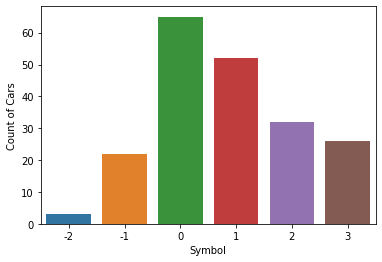

In [162]:
plt = sns.countplot(df_clean['symboling'])
plt.set(xlabel = 'Symbol', ylabel= 'Count of Cars')

symboling : Its assigned insurance risk rating,A value of +3 indicates that the auto is risky,-3 that it is probably pretty safe.

Text(0, 0.5, 'Avg Price (Dollars)')

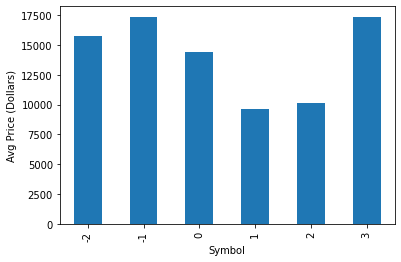

In [163]:
plt1 = df_clean[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")

More than 50% of cars are with symbol 0 or 1,Average price of car is lower for 0,1 & 2 symbol category.

Text(0, 0.5, 'Avg Price (Dollars)')

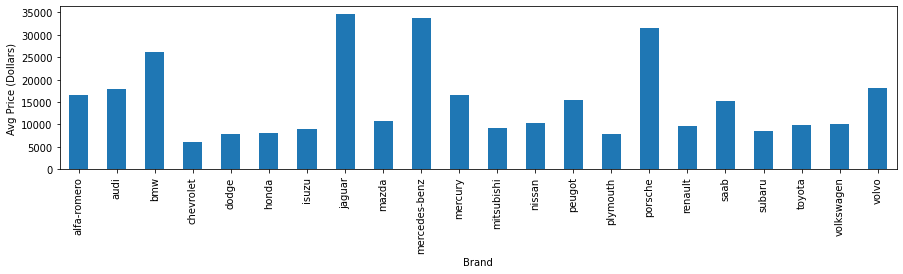

In [164]:
df_compnay_avg_price = df_clean[['make','price']].groupby("make", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_compnay_avg_price.plot(x = 'make', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")

Text(0, 0.5, 'Avg Price (Dollars)')

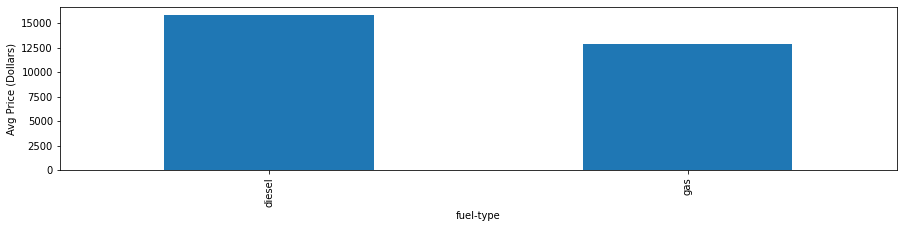

In [165]:
df_fuel_avg_price = df_clean[['fuel-type','price']].groupby("fuel-type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'fuel-type', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("fuel-type")
plt1.set_ylabel("Avg Price (Dollars)")

Text(0, 0.5, 'Avg Price (Dollars)')

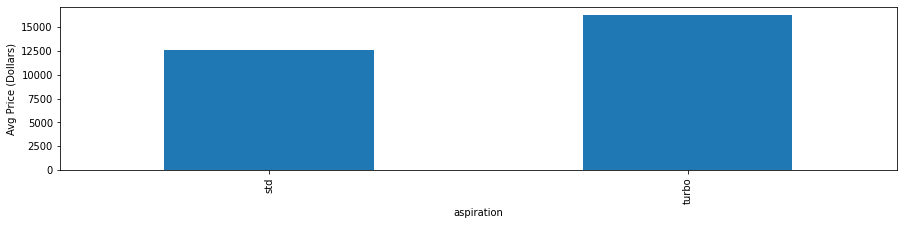

In [166]:
df_compnay_avg_price = df_clean[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = df_compnay_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("aspiration")
plt1.set_ylabel("Avg Price (Dollars)")

Text(0, 0.5, 'Avg Price (Dollars)')

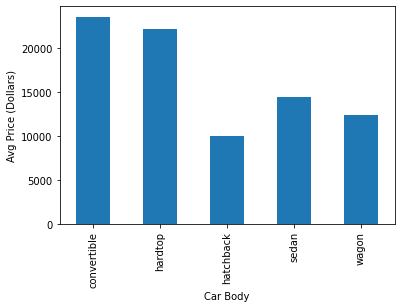

In [167]:
df_body_avg_price = df_clean[['body-style','price']].groupby("body-style", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'body-style', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")

 Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.

Text(0, 0.5, 'Avg Price (Dollars)')

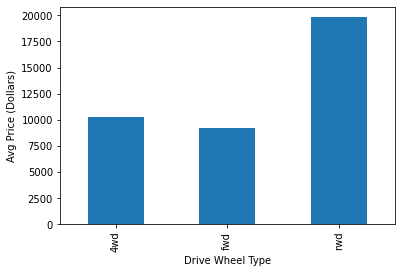

In [168]:
df_drivewheel_avg_price = df_clean[['drive-wheels','price']].groupby("drive-wheels", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drive-wheels', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")

Cars with Rear wheel drive have a higher price value

In [169]:
df_clean['mileage'] = df_clean['city-mpg']*0.55 + df_clean['highway-mpg']*0.4

Text(0, 0.5, 'Price of Car (Dollars)')

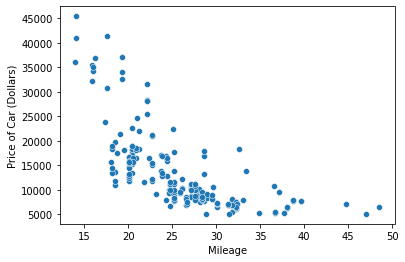

In [170]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = df_clean)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')


Text(0, 0.5, 'Price of Car (Dollars)')

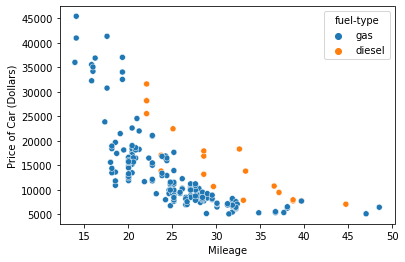

In [171]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fuel-type', data = df_clean)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')


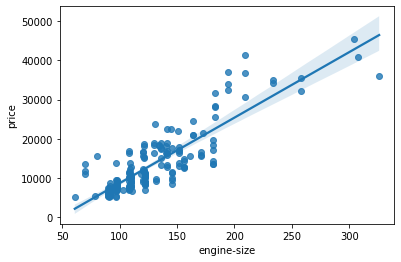

In [172]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df_clean)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.


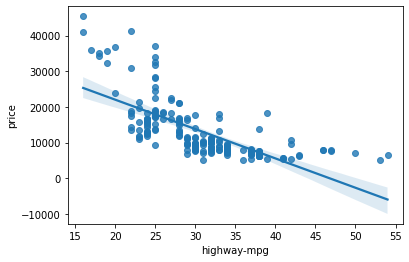

In [173]:
sns.regplot(x="highway-mpg", y="price", data=df_clean)

As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

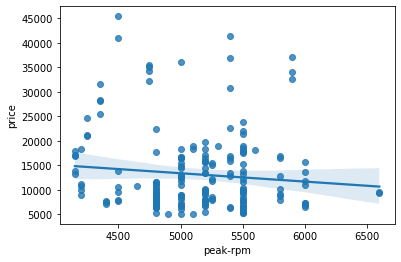

In [174]:
sns.regplot(x="peak-rpm", y="price", data=df_clean)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

Text(0.5, 0, 'Make')

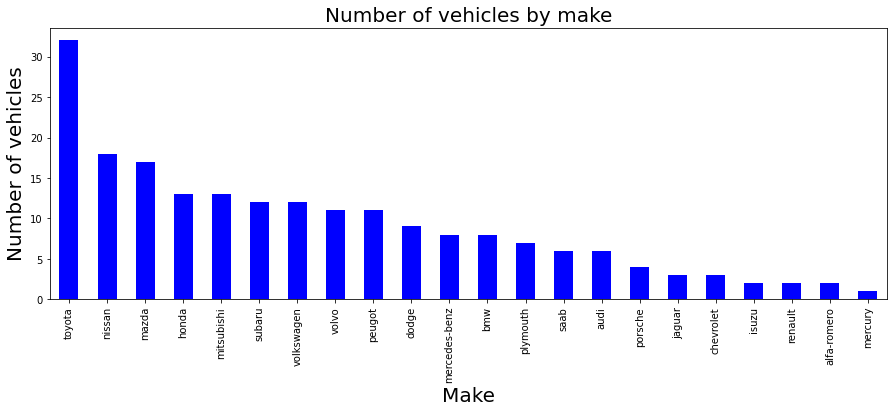

In [175]:
ax = df_clean.make.value_counts().nlargest(25).plot(kind='bar',color="blue",figsize=(15,5))
ax.set_title("Number of vehicles by make", fontsize=20)
ax.set_ylabel('Number of vehicles', fontsize=20)
ax.set_xlabel('Make', fontsize=20)

from the above figure the compnay toyota has highest number of vehicales compare to all other compnays .
Toyota, a Japanese company has the most no of models.

## Data Prepration
## Encoding Technique

In [176]:
encoder = BinaryEncoder() 
encoding_categorical = encoder.fit_transform(df_categorical)
encoding_categorical.shape

(200, 57)

In [177]:
df_encoded = pd.concat([df_numerical,df_missing_numerical, encoding_categorical], axis=1, join='inner')
display(df_encoded)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,normalized-losses,bore,stroke,horsepower,peak-rpm,normalized-losses_0,normalized-losses_1,normalized-losses_2,normalized-losses_3,normalized-losses_4,normalized-losses_5,make_0,make_1,make_2,make_3,make_4,fuel-type_0,fuel-type_1,aspiration_0,aspiration_1,num-of-doors_0,num-of-doors_1,body-style_0,body-style_1,body-style_2,drive-wheels_0,drive-wheels_1,engine-location_0,engine-location_1,engine-type_0,engine-type_1,engine-type_2,num-of-cylinders_0,num-of-cylinders_1,num-of-cylinders_2,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore_0,bore_1,bore_2,bore_3,bore_4,bore_5,stroke_0,stroke_1,stroke_2,stroke_3,stroke_4,stroke_5,horsepower_0,horsepower_1,horsepower_2,horsepower_3,horsepower_4,horsepower_5,peak-rpm_0,peak-rpm_1,peak-rpm_2,peak-rpm_3,peak-rpm_4
0,3,88.6,168.8,64.1,48.8,2548,130,9.00,21,27,16500,115,3.47,2.68,111,5000,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,1,94.5,171.2,65.5,52.4,2823,152,9.00,19,26,16500,115,2.68,3.47,154,5000,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,2,99.8,176.6,66.2,54.3,2337,109,10.00,24,30,13950,164,3.19,3.40,102,5500,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0
3,2,99.4,176.6,66.4,54.3,2824,136,8.00,18,22,17450,164,3.19,3.40,115,5500,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
4,2,99.8,177.3,66.3,53.1,2507,136,8.50,19,25,15250,115,3.19,3.40,110,5500,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
5,1,105.8,192.7,71.4,55.7,2844,136,8.50,19,25,17710,158,3.19,3.40,110,5500,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
6,1,105.8,192.7,71.4,55.7,2954,136,8.50,19,25,18920,115,3.19,3.40,110,5500,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0
7,1,105.8,192.7,71.4,55.9,3086,131,8.30,17,20,23875,158,3.13,3.40,140,5500,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
8,2,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16430,192,3.50,2.80,101,5800,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1
9,0,101.2,176.8,64.8,54.3,2395,108,8.80,23,29,16925,192,3.50,2.80,101,5800,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1


## Model Bulding

## spliating the data into traning and testing sets

In [178]:
X = df_encoded.drop(columns=["price"])
y = df_encoded.loc[:,"price"]

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=50)

## Rescaling the features

In [180]:
scaler = MinMaxScaler()
df_train= scaler.fit_transform(X_train)
df_test = scaler.transform(X_test)

In [181]:
df_train_scaled = pd.DataFrame(df_train, columns= X_train.columns)

In [182]:
df_train_scaled.head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,normalized-losses,bore,stroke,horsepower,peak-rpm,normalized-losses_0,normalized-losses_1,normalized-losses_2,normalized-losses_3,normalized-losses_4,normalized-losses_5,make_0,make_1,make_2,make_3,make_4,fuel-type_0,fuel-type_1,aspiration_0,aspiration_1,num-of-doors_0,num-of-doors_1,body-style_0,body-style_1,body-style_2,drive-wheels_0,drive-wheels_1,engine-location_0,engine-location_1,engine-type_0,engine-type_1,engine-type_2,num-of-cylinders_0,num-of-cylinders_1,num-of-cylinders_2,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore_0,bore_1,bore_2,bore_3,bore_4,bore_5,stroke_0,stroke_1,stroke_2,stroke_3,stroke_4,stroke_5,horsepower_0,horsepower_1,horsepower_2,horsepower_3,horsepower_4,horsepower_5,peak-rpm_0,peak-rpm_1,peak-rpm_2,peak-rpm_3,peak-rpm_4
0,0.2,0.544828,0.560976,0.529915,0.508333,0.359193,0.230189,0.10625,0.388889,0.421053,0.000000,0.550000,0.700000,0.205607,0.020408,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,0.8,0.368966,0.497561,0.444444,0.658333,0.314973,0.181132,0.18750,0.361111,0.421053,0.151832,0.464286,0.633333,0.242991,0.551020,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.4,0.341379,0.557724,0.188034,0.525000,0.342901,0.184906,0.12500,0.388889,0.447368,0.104712,0.435714,0.719048,0.177570,0.673469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.4,0.313793,0.409756,0.350427,0.433333,0.305275,0.184906,0.96875,0.583333,0.526316,0.136126,0.521429,0.609524,0.037383,0.142857,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
4,0.6,0.341379,0.455285,0.487179,0.266667,0.312258,0.184906,0.13125,0.333333,0.394737,0.219895,0.435714,0.719048,0.242991,0.551020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.2,0.610345,0.775610,0.589744,0.808333,0.599690,0.301887,0.15625,0.277778,0.315789,0.047120,0.885714,0.514286,0.308411,0.510204,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6,0.8,0.368966,0.497561,0.444444,0.658333,0.299845,0.135849,1.00000,0.666667,0.789474,0.298429,0.335714,0.633333,0.018692,0.265306,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
7,1.0,0.431034,0.739837,0.529915,0.691667,0.512025,0.226415,0.12500,0.166667,0.263158,0.445026,0.714286,0.476190,0.523364,0.551020,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.4,0.582759,0.778862,0.564103,0.658333,0.675718,0.558491,0.06250,0.083333,0.157895,0.261780,0.771429,0.628571,0.626168,0.510204,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.

In [183]:
df_test_scaled = pd.DataFrame(df_test, columns= X_test.columns)

In [184]:
df_test_scaled.head(10)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,normalized-losses,bore,stroke,horsepower,peak-rpm,normalized-losses_0,normalized-losses_1,normalized-losses_2,normalized-losses_3,normalized-losses_4,normalized-losses_5,make_0,make_1,make_2,make_3,make_4,fuel-type_0,fuel-type_1,aspiration_0,aspiration_1,num-of-doors_0,num-of-doors_1,body-style_0,body-style_1,body-style_2,drive-wheels_0,drive-wheels_1,engine-location_0,engine-location_1,engine-type_0,engine-type_1,engine-type_2,num-of-cylinders_0,num-of-cylinders_1,num-of-cylinders_2,fuel-system_0,fuel-system_1,fuel-system_2,fuel-system_3,bore_0,bore_1,bore_2,bore_3,bore_4,bore_5,stroke_0,stroke_1,stroke_2,stroke_3,stroke_4,stroke_5,horsepower_0,horsepower_1,horsepower_2,horsepower_3,horsepower_4,horsepower_5,peak-rpm_0,peak-rpm_1,peak-rpm_2,peak-rpm_3,peak-rpm_4
0,0.4,0.734483,0.741463,0.692308,0.741667,0.684251,0.343396,0.87500,0.416667,0.447368,0.502618,0.828571,0.690476,0.219626,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.8,0.406897,0.570732,0.452991,0.350000,0.461986,0.320755,0.14375,0.305556,0.368421,0.361257,0.771429,0.680952,0.317757,0.265306,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,0.6,0.582759,0.778862,0.564103,0.658333,0.607836,0.388679,0.12500,0.194444,0.236842,0.261780,0.550000,0.533333,0.341121,0.040816,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.244828,0.263415,0.350427,0.250000,0.176881,0.116981,0.15000,0.500000,0.578947,0.502618,0.307143,0.552381,0.093458,0.551020,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.4,0.355172,0.528455,0.435897,0.591667,0.450737,0.177358,0.04375,0.277778,0.184211,0.104712,0.771429,0.271429,0.294393,0.265306,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
5,0.6,0.244828,0.263415,0.299145,0.250000,0.150504,0.109434,0.15000,0.500000,0.578947,0.277487,0.307143,0.552381,0.093458,0.551020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.2,0.775862,0.775610,0.735043,0.641667,0.610551,0.301887,0.15625,0.166667,0.236842,0.157068,0.885714,0.514286,0.308411,0.510204,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.8,0.503448,0.580488,0.384615,0.541667,0.351823,0.177358,0.11250,0.277778,0.342105,0.664921,0.685714,0.347619,0.247664,0.673469,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
8,0.4,0.341379,0.557724,0.418803,0.525000,0.378976,0.184906,0.12500,0.305556,0.315789,0.104712,0.435714,0.719048,0.247664,0.673469,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.

## model creation

In [185]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()

## Hyper parameter tunning 

In [186]:
##hyperparameter tunning 
from sklearn.model_selection import GridSearchCV
params = { "fit_intercept":[True,False],
    "normalize":[True,False],
    "n_jobs":[1,0,-1],
    "positive":[True,False]}
grid_clf = GridSearchCV(estimator=le, param_grid=params,cv=4,scoring="r2")
grid_clf.fit(X,y)

GridSearchCV(cv=4, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [1, 0, -1],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [187]:
grid_clf.best_params_

{'fit_intercept': False, 'n_jobs': 1, 'normalize': True, 'positive': True}

In [188]:
from sklearn.linear_model import LinearRegression
le = LinearRegression(fit_intercept=True, n_jobs=1, normalize=False, positive=False)
le.fit(df_train_scaled,y_train)
y_pred = le.predict(df_test_scaled)
le.score(df_test_scaled, y_test)

0.9240231323334487

In [189]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2score", r2_score(y_test,y_pred))

MAE 1634.2594379648217
MSE 4534785.465658545
RMSE 2129.5035725864714
r2score 0.9240231323334487


In [190]:
#le.score(y_train, le.predict(X_train))
le.score(df_train_scaled,y_train)

0.975262659166104

In [191]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
decisionregressor = DecisionTreeRegressor(random_state = 0)
Randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)

In [192]:
decisionregressor.fit(df_train_scaled, y_train)
Randomregressor.fit(df_train_scaled, y_train)
xgb_r.fit(df_train_scaled, y_train)

[05:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=10, seed=123)

In [193]:
y_pred_dr = decisionregressor.predict(df_test_scaled)
decisionregressor.score(df_test_scaled, y_test)

0.9155926613730596

In [194]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred_dr))
print("MSE",mean_squared_error(y_test,y_pred_dr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_dr)))
print("r2score", r2_score(y_test,y_pred_dr))

MAE 1529.6
MSE 5037969.9
RMSE 2244.542247319039
r2score 0.9155926613730596


In [195]:
y_pred_Rr =Randomregressor.predict(df_test_scaled)
Randomregressor.score(df_test_scaled, y_test)

0.9208833011826311

In [196]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred_Rr))
print("MSE",mean_squared_error(y_test,y_pred_Rr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_Rr)))
print("r2score", r2_score(y_test,y_pred_Rr))

MAE 1460.5085
MSE 4722190.673383611
RMSE 2173.0602093323623
r2score 0.9208833011826311


In [197]:
y_pred_xgbr =xgb_r.predict(df_test_scaled)
xgb_r.score(df_test_scaled, y_test)

0.32376078142479214

In [198]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))
print("r2score", r2_score(y_test,y_pred_xgbr))

MAE 4940.364782714843
MSE 40362282.28257443
RMSE 6353.13169095167
r2score 0.32376078142479214


## Lasso and Ridge regression

In [199]:
from sklearn.linear_model import Ridge, Lasso
rd = Ridge()
rd.fit(df_train_scaled,y_train)
rd.score(df_test_scaled, y_test)

0.9257258434178294

In [200]:
ls2 = Lasso(alpha=3)

ls2.fit(df_train_scaled,y_train)

ls2.score(df_test_scaled, y_test)

0.9316165316677393

## conclusions 


1) The number of missing values in numerical features is replaced with median(median because it does not affect outliers)

2) The number of missing values in categorical features is replaced with a mode
(mode because after analysis of feature replaced with mode )

3) Exploratory data analysis had done to depth knowledge of data

4) In data visualization I had found the relationship between the features 

5) I have used the binary encoding technique because this encoding technique is giving the best results compared to other techniques ( i have tried one-hot encoding, label encoding but the accuracy  was not good )

6) As it is a regression problem so the scaling of features is important so the scaling is done using MinMax Scaling
(MinMAXScaling is sensitive to outliers but it gives the best accuracy compared to standard scaler )

7) Model creation, in the model creation I have gone through hyperparameter tunning, which is done with GridsearchCV I got the best parameters for linear regression

8) linear regression algorithm is used the got 95% r2 score, I have tried with other algorithm but accuracy was not good to compare to linear regression.


### problem faced during project

1) The accuracy using the linear regression model was 95% it is good but the MSE and MAE was too large

2) To decrease the MSE and MAE I have tried with

a) Feature selection (like correlation technique but the accuracy was decreasing so I have not used feature selection technique )
b) Handling outliers ( tried with zscore, quantile but the accuracy was decreasing )
c) Model selection ( tried with Kfold cross-validation to not repeat the samples but the accuracy was decreasing )

3) lastly I got the region behind the MSE because the range of the target values were high, there are some outliers
